# [ERG-190C] Homework 3: EDA Energy Access 
<br>

### Table of Contents
[Introduction](#intro)<br>
1 - [The Data](#data)<br>
2 - [Classifying Countries](#classify)<br>
3 - [Computing HDI](#compute)<br>
4 - [Country Rankings](#rank)<br>

## Introduction <a id='intro'></a>

In this homework, you will investigate the Human Development Index (HDI) and its components. The main goal for this assignment is to understand how various factors such as GNI per capita, life expectancy, and education affect HDI. 

We will accomplish this by analyzing World Bank data and utilizing exploratory data analysis (EDA). To give you a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

### Topics Covered 

* Work with different file types
* Merge dataframes and perform operations to add new columns
* View data through lens of structure, granularity, scope, temporality and faithfulness
* Understand how HDI is constructed
* Perform basic data cleaning operations.

**Dependencies:**

In [1]:
# Run this cell to set up your notebook.  Make sure utils.py is in this assignment's folder
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from IPython.display import display, Latex, Markdown

----
## Section 1: The Data<a id='data'></a>

In this notebook, you'll be working with data from the World Bank on GNI per capita, life expectancy, and education for different countries and regions around the world. Feel free to visit the links below to play around with the visualizations on the World Bank website as well: <br>
A. GNI per capita data: https://data.worldbank.org/indicator/NY.GNP.PCAP.PP.CD <br>
B. Life expectancy data: http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3ASP.DYN.LE00.IN. <br>
C. Education data: expected years of schooling: http://hdr.undp.org/en/indicators/69706, mean years of schooling: http://hdr.undp.org/en/indicators/103006

<br>
**Question 1.1:** Look through the `data` folder and then load the csv or tsv files into the homework so we can work with the data. The first example has been done for you.

In [2]:
#Due to World Bank's data layout we have to download an table on GNI info of different countries and GNI yearly data
#GNI information and income groups
gni_info = pd.read_csv("data/GNI_country_metadata.csv")
gni_info.head()

,Country Code,Region,Income Group,Special Notes,Country Name,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


----

In [3]:
#Solution
#GNI per capita, PPP (current international $)
gni_num = pd.read_csv("data/gni_ppp.csv")
gni_num.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Afghanistan,AFG,..,..,1250,1490,1590,1680,1900,1940,1950,1940,1970,2000
1,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Albania,ALB,2720,4150,8270,8670,9540,10210,10450,10750,11360,11470,11750,12120
2,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Algeria,DZA,6390,7690,12070,12130,12580,12850,13160,13420,13900,14220,14870,15050
3,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..


In [4]:
#Run this cell
#Merging GNI description data with GNI PPP data
#GNI per capita, PPP (current international $)
gni_all = gni_num.merge(gni_info[['Country Code', 'Region', 'Income Group']], on='Country Code')
gni_all.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],Region,Income Group
0,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Afghanistan,AFG,..,..,1250,1490,1590,1680,1900,1940,1950,1940,1970,2000,South Asia,Low income
1,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Albania,ALB,2720,4150,8270,8670,9540,10210,10450,10750,11360,11470,11750,12120,Europe & Central Asia,Upper middle income
2,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Algeria,DZA,6390,7690,12070,12130,12580,12850,13160,13420,13900,14220,14870,15050,Middle East & North Africa,Upper middle income
3,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,East Asia & Pacific,Upper middle income
4,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,Europe & Central Asia,High income


In [5]:
#Solution
#Life expectancy at birth for both sexes combined (years)
life = pd.read_csv("data/life.csv")

print('Number of unique country names is', len(pd.unique(life['Country or Area'])))
life.head()

Number of unique country names is 194


,Country or Area,Year(s),GENDER,Value,Value Footnotes
0,Afghanistan,2012,Male,58,NaN
1,Afghanistan,2012,Female,61,NaN
2,Afghanistan,2012,Both sexes,60,NaN
3,Afghanistan,2000,Male,54,NaN
4,Afghanistan,2000,Female,56,NaN


In [6]:
#Solution
#Expected years of schooling (years)
expected_edu = pd.read_csv("data/expected_edu.csv")

print('Number of unique country names is', len(pd.unique(expected_edu['Country'])))
expected_edu.head()

Number of unique country names is 194


,Unnamed: 0,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,169,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,...,8.4,8.7,8.9,9.2,9.5,9.8,9.9,10.0,10.1,10.1
1,1,75,Albania,11.6,11.8,10.7,10.2,10.1,10.2,10.3,...,11.6,12.0,12.2,12.5,13.3,14.2,14.2,14.2,14.2,14.2
2,2,83,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10.0,...,12.3,12.6,13.1,13.6,14.0,14.4,14.4,14.4,14.4,14.4
3,3,32,Andorra,10.8,10.8,10.8,10.8,10.8,10.8,10.8,...,11.2,11.2,11.7,11.7,11.7,11.7,13.5,13.5,13.5,13.5
4,4,150,Angola,3.8,3.6,3.5,3.7,3.8,3.9,4.0,...,7.7,8.1,8.5,9.0,9.4,10.3,11.4,11.4,11.4,11.4


In [7]:
#Solution
#Mean years of schooling (years)
mean_edu = pd.read_csv("data/mean_edu.csv")
mean_edu.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,169,Afghanistan,1.5,1.6,1.6,1.7,1.8,1.9,1.9,2.0,...,2.7,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.5,3.5
1,75,Albania,7.4,7.5,7.6,7.8,7.9,8.0,8.1,8.2,...,8.9,8.9,9.0,9.0,9.1,9.3,9.6,9.6,9.6,9.6
2,83,Algeria,3.6,3.8,4.0,4.3,4.5,4.7,5.0,5.2,...,6.6,6.6,6.7,6.9,7.1,7.3,7.5,7.8,7.8,7.8
3,32,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.5,9.5,9.6,9.9,10.3,10.3
4,150,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,4.5,4.6,4.7,4.7,4.7,4.8,4.9,4.9,5.0


What do you notice?

**Important points for solution**:
- different number of countries in different datasets
- NaN values for certain countries

**Question 1.2:** 
Analyze the loaded tables and see what data types are within the table. 
<br>Then for each of the tables answer, what is the:
1. structure of the data?<br>
2. granularity of the data?<br>
3. scope of the data?<br>
4. temporality of the data?<br>
5. faithfulness of the data?<br>

Reminder:
* Scope - Are all countries included? Within each country can you find information about whether data are derived from a census, random sample, or other? 
* Faithfulness - Where do the data come from? Is there any reason to question it? 
* Granularity - What level of detail is the data? Is the data high granularity or low granularity (e.g. hourly data vs. yearly data)?

**Important points for solution**:
- I'm not going to write out everything here; just be sure to hit at least a few examples for each question. Refer to the lectures slides if you need more information.

**Question 1.3:** How many regions are in the GNI info table?

In [8]:
#Solution 1
count_regions = gni_info.groupby(['Region']).count()
count_regions

,Country Code,Income Group,Special Notes,Country Name,Unnamed: 5
Region,,,,,
East Asia & Pacific,37,37,23,37,0
Europe & Central Asia,58,58,27,58,0
Latin America & Caribbean,42,42,14,42,0
Middle East & North Africa,21,21,13,21,0
North America,3,3,1,3,0
South Asia,8,8,7,8,0
Sub-Saharan Africa,48,48,28,48,0


In [9]:
#Solution 2
count_regions = (pd.Series.nunique(gni_info['Region']))

print('There are', count_regions, 'regions.')

There are 7 regions.


----
## Section 2: Classifying Countries<a id='classify'></a>

We can see that the GNI per capita data is higher granularity than the life expectancy and education data because it contains the country codes and regions. Let's try to merge these datasets.

<br>
**Question 2.1:** Merge the life expectancy table and the GNI_info tables. The final table should have have 1503 rows.

In [10]:
#Solution
#copy column and rename so it can be merged with gni table
life['Country Name'] = life['Country or Area']

#create merged table
life_info = gni_info.merge(life, on='Country Name')

#drop unneeded columns
life_info.drop(['Unnamed: 5', 'Value Footnotes'], axis=1, inplace=True)

print('life shape is ', life.shape,' gni_info shape is ', gni_info.shape,' and life_info shape is ', life_info.shape)
life_info.head()

life shape is  (1746, 6)  gni_info shape is  (263, 6)  and life_info shape is  (1503, 9)


,Country Code,Region,Income Group,Special Notes,Country Name,Country or Area,Year(s),GENDER,Value
0,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2012,Male,58
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2012,Female,61
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2012,Both sexes,60
3,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2000,Male,54
4,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2000,Female,56


**Question 2.2:** The merged shape differs from the two original data frames.  Why?  Use the function `returnNotMatches` below to investigate country names.

In [11]:
#Run this cell
#For the next question, we'll use this little function to compare two lists (don't edit this)
def returnNotMatches(a, b):
    a = set(a)
    b = set(b)
    return [list(b - a), list(a - b)]

In [12]:
#Solution
diffs = returnNotMatches(life['Country or Area'],gni_info['Country Name'])
print('Countries and regions only in `life` are \n ', diffs[0],'\n') 

print('Countries and regions only in `gni_info` are:\n ', diffs[1])

Countries and regions only in `life` are 
  ['Cayman Islands', 'Micronesia, Fed. Sts.', 'Latin America & Caribbean', 'IBRD only', 'Yemen, Rep.', 'Turks and Caicos Islands', 'Curaçao', 'East Asia & Pacific (excluding high income)', 'Europe & Central Asia (excluding high income)', 'Liechtenstein', 'Tanzania', 'Gibraltar', 'Central Europe and the Baltics', 'Least developed countries: UN classification', 'Faroe Islands', 'Channel Islands', 'Sub-Saharan Africa (IDA & IBRD)', 'High income', 'Virgin Islands (U.S.)', 'Iran, Islamic Rep.', 'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia', 'Macao SAR, China', 'Latin America & Caribbean (IDA & IBRD)', 'Low income', "Côte d'Ivoire", 'IDA & IBRD total', 'British Virgin Islands', 'American Samoa', 'Low & middle income', 'IDA only', 'IDA blend', 'Euro area', 'St. Kitts and Nevis', 'Bahamas, The', 'South Asia', 'Venezuela, RB', 'Pre-demographic dividend', 'Aruba', 'Puerto Rico', 'Middle East & North Africa', 'Sub-Saharan Africa', 'Greenla

**Important points for solution**:
- some contries are spelled differently, even if they exist in both datasets
- how the lists are used to merge the two data frames depends on the merge function used (inner, outer, etc.)
- 'life' includes non-countries like 'middle income,' 'ida total,' etc.

**Question 2.3:** Merge the expected years of schooling table and the mean years of schooling table for the year 2012 to agglomerate a table of all the years of schooling then take out unneeded columns. The final table should be called `education` and have 186 rows and contain the columns:
1. `HDI Rank_mean` (this is the HDI rank as saved in the mean education data)
1. `HDI Rank_expected` (this is the HDI rank as saved in the expected education data)
1.  `Country`	
1. `2012_mean` (this is the education years as saved in the mean education data)
1. `2012_expected` (this is the education years as saved in the expected education data)

*Hint: `loc` and `rename` are helpful to get the required data*

In [14]:
#Solution
copy_exp = expected_edu.loc[:, ['HDI Rank', 'Country', '2012']]
copy_exp = copy_exp.rename(columns={'HDI Rank':'HDI Rank_expected', '2012':'2012_expected'})
copy_mean = mean_edu.loc[:, ['HDI Rank', 'Country', '2012']] 
copy_mean = copy_mean.rename(columns={'HDI Rank':'HDI Rank_mean', '2012':'2012_mean'})

education = copy_exp.merge(copy_mean, on='Country')

print('education shape is ', education.shape)
education.head()

education shape is  (186, 5)


,HDI Rank_expected,Country,2012_expected,HDI Rank_mean,2012_mean
0,169,Afghanistan,9.9,169,3.4
1,75,Albania,14.2,75,9.6
2,83,Algeria,14.4,83,7.5
3,32,Andorra,13.5,32,9.6
4,150,Angola,11.4,150,4.8


**Question 2.4:** Create a bar plot of the expected vs. mean years of schooling in 2012 for the United States. Use the method `.plot` on the data frame.

Text(0.5,1,'Expected vs. Mean Years of Schooling in 2012 for the United States')

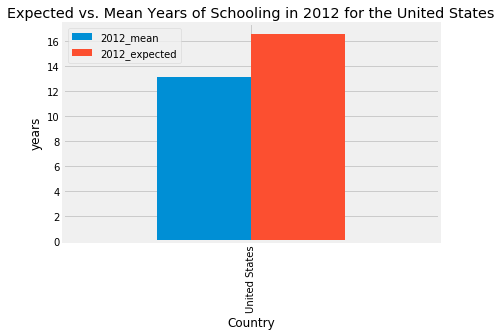

In [15]:
#Solution
bool = education['Country'] == 'United States'
education_us = education[bool]
education_us.plot(x='Country', y=['2012_mean', '2012_expected'], kind='bar')
plt.ylabel("years")
plt.title("Expected vs. Mean Years of Schooling in 2012 for the United States")

**Question 2.5:** Compare the mean years of schooling in 2012 with the expected years of schooling in 2012 for the United States. What factors (i.e. income, health, etc.) do you think effect the mean vs. the expected schooling?

**Important points for solution:**
- understanding of how expected and mean years of schooling are calculated (referencing documentation)
- some sort of thoughtful guess as to what factors might lead to a difference in mean vs. expected values

**Question 2.6:** Create a dataframe called `life_info_2012both` from `merge` where the data is only from the year 2012 with both sexes.

In [16]:
#Solution
bool = life_info['Year(s)'] == 2012
life_info_2012 = life_info[bool]

bool = life_info_2012['GENDER'] == 'Both sexes'
life_info_2012both = life_info_2012[bool]

print('New data frame shape is ', life_info_2012both.shape)
life_info_2012both.head()

New data frame shape is  (167, 9)


,Country Code,Region,Income Group,Special Notes,Country Name,Country or Area,Year(s),GENDER,Value
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2012,Both sexes,60
11,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,Angola,2012,Both sexes,51
20,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,Albania,2012,Both sexes,74
29,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,Andorra,2012,Both sexes,83
38,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,United Arab Emirates,2012,Both sexes,76


**Question 2.7:** Merge your `life_info_2012both` table with your `education` table to create a table that aggregates almost all the tables we have worked with so far.

In [17]:
#Solution
#rename columns
life_info_2012both = life_info_2012both.rename(columns={'Country or Area': 'Country'})

#merge tables
life_ed_info = life_info_2012both.merge(education, on='Country')

print('life_ed_info shape is ', life_ed_info.shape)
life_ed_info.head()

life_ed_info shape is  (161, 13)


,Country Code,Region,Income Group,Special Notes,Country Name,Country,Year(s),GENDER,Value,HDI Rank_expected,2012_expected,HDI Rank_mean,2012_mean
0,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,Afghanistan,2012,Both sexes,60,169,9.9,169,3.4
1,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,Angola,2012,Both sexes,51,150,11.4,150,4.8
2,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,Albania,2012,Both sexes,74,75,14.2,75,9.6
3,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,Andorra,2012,Both sexes,83,32,13.5,32,9.6
4,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,United Arab Emirates,2012,Both sexes,76,42,13.3,42,9.2


**Question 2.8** Create and display a list of countries that were lost when you merged `life_info_2012both` with `education`.  

In [18]:
#Solution
diffs = returnNotMatches(life_info_2012both['Country'],education['Country'])

print('Countries and regions only in `life_info_2012both` are \n ', diffs[0],'\n') 
print('Countries and regions only in `education` are:\n ', diffs[1])

Countries and regions only in `life_info_2012both` are 
  [nan, 'Congo', 'Moldova (Republic of)', 'Korea (Republic of)', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'United States', 'Saint Vincent and the Grenadines', 'Saint Kitts and Nevis', 'Egypt', 'Sao Tome and Principe', 'Liechtenstein', 'Congo (Democratic Republic of the)', 'Bolivia (Plurinational State of)', 'Venezuela (Bolivarian Republic of)', 'Gambia', 'The former Yugoslav Republic of Macedonia', 'Viet Nam', 'Iran (Islamic Republic of)', 'Tanzania (United Republic of)', 'Yemen', 'Saint Lucia', 'Slovakia', 'Bahamas', 'Kyrgyzstan'] 

Countries and regions only in `education` are:
  ['San Marino', 'Monaco', 'Tuvalu', 'Nauru', 'Somalia', 'Marshall Islands']


**Important points for solution**:
- similar to 2.2; which list got prioritized, and why? 

**Question 2.9:** According to our aggregate dataframe, what is the 
1. structure of the data?
1. granularity of the data?
1. scope of the data?
1. temporality of the data?
1. faithfulness of the data?

**Important points for solution**:
- refer to 1.2

In [19]:
# RUN THIS CELL
# Note, the HDI rank data are strings, so we'll convert them to numbers before proceeding.  
life_ed_info['HDI Rank_mean'] = pd.to_numeric(life_ed_info['HDI Rank_mean'])

**Question 2.10:** Group the `'HDI Rank_mean'` data by `'Income Group'`.  Summarize the data in a way that allows you to describe the relationship between HDI and income.

*Hint: the function `groupby` and `.aggregate` are useful*

In [20]:
#Solution
HDIbyGroup = life_ed_info['HDI Rank_mean'].groupby(life_ed_info['Income Group'])
HDIbyGroup_min = HDIbyGroup.aggregate(np.min)
HDIbyGroup_max = HDIbyGroup.aggregate(np.max)
HDIbyGroup_mean = HDIbyGroup.aggregate(np.mean)
HDIbyGroup_summary = pd.DataFrame({'min':HDIbyGroup_min,'mean':HDIbyGroup_mean,'max':HDIbyGroup_max})
HDIbyGroup_summary

,max,mean,min
Income Group,,,
High income,65,30.294118,1
Low income,188,169.642857,129
Lower middle income,172,131.371429,70
Upper middle income,135,87.936170,48


<br>

----

## Section 3. Computing HDI<a id='compute'></a>

<br>
<img src="hdi.png" width=800>

In this section, we will normalize each individual metric (GNI, life expectancy, education) and compute HDI based on the United Nations guide [here](http://hdr.undp.org/sites/default/files/hdr2016_technical_notes_0.pdf "UNDP HDI Notes"). "The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions."

<br>
The formula for calculating HDI is here:  
<img src="hdicalc.png" width=300>

<br>
Before we proceed, we're going to load in a correctly merged version of the data from the last section (in case you ran into errors).  Note also we've massaged the data a little, so it's important to use this table.

In [27]:
# RUN THIS CELL
life_ed_gni = pd.read_csv('data/life_ed_gni.csv')
life_ed_gni.head()

,Income Group,Country,Year(s),Life,Ed_expected,HDI Rank,Ed_mean,GNI
0,Low income,Afghanistan,2012,60,9.9,169,3.4,1900.0
1,Lower middle income,Angola,2012,51,11.4,150,4.8,5550.0
2,Upper middle income,Albania,2012,74,14.2,75,9.6,10450.0
3,High income,Andorra,2012,83,13.5,32,9.6,NaN
4,High income,United Arab Emirates,2012,76,13.3,42,9.2,60600.0


**Question 3.1:** Define a function that normalizes GNI. Test this function by inputting Afghanistan's GPP in 2012 (use the `gni_all` table).

In [28]:
#Solution
def normalize_GNI(gni):
    """
    Normalize GNI to get the Income Index.

    Args:
        An integer corresponding to the GNI PPP
        of a country and year

    Returns:
        The Income Index (int)
    """
    numerator = (np.log(gni)-np.log(100))
    denominator = (np.log(75000)-np.log(100))
    return np.divide(numerator, denominator)

Run the following cell -- if it raises an error, that means there's an error in the function.

In [29]:
#RUN THIS CELL
first_num = life_ed_gni.loc[0,'GNI']

test_gni_ans = normalize_GNI(first_num)

assert test_gni_ans == 0.4447743835010624

**Question 3.2:** Define a function that normalizes life expectancy. Test this function by inputting Afghanistan's life expectancy for both sexes in 2012.

In [30]:
#Solution
def normalize_life(life):
    """
    Normalize life expectancy to get the Life Expectancy Index.

    Args:
        An integer corresponding to the life
        expectancy for both sexes

    Returns:
        The Life Expectancy Index (int)
    """
    sub = life-20
    constants = 85-20
    return np.divide(sub, constants)

Test the function by running the cell below -- if it raises an error, that means there's an error with the function.

In [31]:
#RUN THIS CELL
life_num = life_ed_gni.loc[0,'Life']

test_life_ans = normalize_life(life_num)
assert test_life_ans == 0.6153846153846154

**Question 3.3:** Define a function that calculates the Expected Index. Test this function by inputting Afghanistan's expected years of schooling for 2012 and mean years of schooling for 2012.

In [32]:
#Solution
def normalize_ed(mean_var, exp_var):
    """
    Normalize years of schooling to get the Years of Schooling Index.

    Args:
        First variable is mean education, second is expected education.

    Returns:
        The Years of Schooling Index (int)
    """ 
    mysi = np.divide(mean_var, 15)
    eysi = np.divide(exp_var, 18)
    add = mysi+eysi
    return np.divide(add, 2)

Test the function by running the cell below -- if it raises an error, that means there's an error with the function.

In [33]:
#RUN THIS CELL
ed_nums = life_ed_gni.loc[0,['Ed_mean', 'Ed_expected']]

test_ed_ans = normalize_ed(ed_nums[0],ed_nums[1])
assert  test_ed_ans == 0.38833333333333336

**Question 3.4:** Define a function that calculates the HDI. Test this function by inputting Afghanistan's normalized GPP in 2012, normalized life expectancy for both sexes in 2012, and normalized expected years of schooling in 2012.

In [34]:
#Solution
def calc_hdi(gni_var, life_var, ed_var):
    """
    Compute HDI from normalized gni, life and education variables.
    
    Args:
        normalized gni (first entry), life (second entry) and education (third entry).
    
    Returns: 
        The HDI (float)
    """ 
    var = gni_var * life_var * ed_var
    return var **(np.divide(1,3))

In [35]:
#these three values were calculated using the previous three functions
assert calc_hdi(test_gni_ans, test_life_ans, test_ed_ans) == 0.4736930620781577

**Question 3.5:** Why is it important to normalize each individual metric in the HDI?

**Important points for solution:**
- comparability across metrics
- equal weights; gets rid of issue of different units of measurement as well

**Question 3.6:** Use .apply() to create three new columns in the life_ed_gni data frame.  

* The first new column will be normalized GNI, called 'GNI_n'
* The second new column will be normalized life, called 'Life_n'
* The third new column will be normalized Education, called 'Ed_n'

In [36]:
#Solution
life_ed_gni['GNI_n']= life_ed_gni['GNI'].apply(normalize_GNI)
life_ed_gni['Life_n']= life_ed_gni['Life'].apply(normalize_life)
life_ed_gni['Ed_n']= life_ed_gni[['Ed_mean','Ed_expected']].apply(lambda x: normalize_ed(x['Ed_mean'], x['Ed_expected']), axis=1)

**Question 3.7:** Find a way to check that all your normalized variables are in the range you expected.  

*Note, if you've done it right, you'll find a few values are just a little outside the range (a few percent), and that's ok*

In [37]:
#Solution
print('Min values are:\n',life_ed_gni.loc[:,'GNI_n':'Ed_n'].min())
print('Max values are:\n',life_ed_gni.loc[:,'GNI_n':'Ed_n'].max())

Min values are:
 GNI_n     0.287324
Life_n    0.400000
Ed_n      0.200556
dtype: float64
Max values are:
 GNI_n     1.070151
Life_n    0.984615
Ed_n      1.000556
dtype: float64


**Question 3.8**: Add a column to the data frame called 'HDI' that contains HDI values computed with `calc_hdi`.  

Hint: As in Question 3.7, to use `.apply` with a function that takes multiple arguments you'll need to use a lambda function.  You can follow the syntax from Question 3.7 here to make it work.  

In [39]:
#Solution
life_ed_gni['HDI'] = life_ed_gni.apply(lambda x: calc_hdi(x['GNI_n'],x['Life_n'],x['Ed_n']), axis = 1)
life_ed_gni.head()

,Income Group,Country,Year(s),Life,Ed_expected,HDI Rank,Ed_mean,GNI,GNI_n,Life_n,Ed_n,HDI
0,Low income,Afghanistan,2012,60,9.9,169,3.4,1900.0,0.444774,0.615385,0.388333,0.473693
1,Lower middle income,Angola,2012,51,11.4,150,4.8,5550.0,0.606698,0.476923,0.476667,0.516668
2,Upper middle income,Albania,2012,74,14.2,75,9.6,10450.0,0.702286,0.830769,0.714444,0.747001
3,High income,Andorra,2012,83,13.5,32,9.6,NaN,NaN,0.969231,0.695000,NaN
4,High income,United Arab Emirates,2012,76,13.3,42,9.2,60600.0,0.967796,0.861538,0.676111,0.826086


**Question 3.9:** Some countries have NaN values for the HDI metrics you created.  Why are they there?  

**Important points for solution**:
- column values were missing for some countries (e.g., in GNI data frame)

----

## Section 4: Country Rankings<a id='rank'></a>

<br>
We will examine how country rankings for HDI compare to rankings for individual metrics (health, education, income). 

Hint: the NaNs we discussed in Question 3.10 might get in the way of you displaying sorted data.  The `.dropna()` method might help.  

**Question 4.1:** Display all columns of the `life_ed_gni` data frame for the 10 countries with the lowest HDI.

In [40]:
#Soluion
life_ed_gni.sort_values('HDI').head(10)

,Income Group,Country,Year(s),Life,Ed_expected,HDI Rank,Ed_mean,GNI,GNI_n,Life_n,Ed_n,HDI
106,Low income,Niger,2012,59,5.3,187,1.6,860.0,0.325036,0.600000,0.200556,0.339447
26,Low income,Central African Republic,2012,51,7.1,188,4.2,960.0,0.341652,0.476923,0.337222,0.380174
142,Low income,Chad,2012,51,7.3,186,2.1,1950.0,0.448698,0.476923,0.272778,0.387916
132,Low income,Sierra Leone,2012,46,9.3,179,3.2,1470.0,0.406015,0.400000,0.365000,0.389910
14,Low income,Burkina Faso,2012,58,7.5,185,1.4,1520.0,0.411067,0.584615,0.255000,0.394252
100,Low income,Mozambique,2012,53,9.1,181,3.3,1010.0,0.349322,0.507692,0.362778,0.400703
135,Low income,South Sudan,2012,55,4.9,181,4.8,1520.0,0.411067,0.538462,0.296111,0.403188
11,Low income,Burundi,2012,56,10.5,184,2.8,790.0,0.312211,0.553846,0.385000,0.405290
95,Low income,Mali,2012,57,8.0,175,2.1,1760.0,0.433213,0.569231,0.292222,0.416135
58,Low income,Guinea-Bissau,2012,54,9.1,178,2.8,1450.0,0.403945,0.523077,0.346111,0.418185


**Question 4.2**: Display all columns of the `life_ed_gni` data frame for the 10 countries with the lowest HDI.

In [41]:
#Soluion
life_ed_gni.sort_values('HDI').dropna().tail(10)

,Income Group,Country,Year(s),Life,Ed_expected,HDI Rank,Ed_mean,GNI,GNI_n,Life_n,Ed_n,HDI
27,High income,Canada,2012,82,15.9,10,12.9,41400.0,0.910242,0.953846,0.871667,0.911301
72,High income,Iceland,2012,82,19.0,9,11.5,36690.0,0.891998,0.953846,0.911111,0.918624
39,High income,Germany,2012,81,16.9,4,13.1,44590.0,0.921454,0.938462,0.906111,0.921914
112,High income,New Zealand,2012,82,19.3,13,12.3,31610.0,0.869486,0.953846,0.946111,0.922347
130,High income,Singapore,2012,83,15.4,5,11.5,74530.0,0.999050,0.969231,0.811111,0.922639
109,High income,Netherlands,2012,81,18.1,7,11.9,47670.0,0.931544,0.938462,0.899444,0.922992
42,High income,Denmark,2012,80,18.7,5,13.0,45820.0,0.925565,0.923077,0.952778,0.933710
28,High income,Switzerland,2012,83,15.8,2,13.4,58880.0,0.963447,0.969231,0.885556,0.938621
110,High income,Norway,2012,82,17.5,1,12.6,65920.0,0.980507,0.953846,0.906111,0.946317
8,High income,Australia,2012,83,20.3,2,13.1,41430.0,0.910351,0.969231,1.000556,0.959310


**Question 4.3**: GNI, life expectancy and education indices are strongly correlated with each other and with HDI for the bottom and the top countries.  But the correlation is not perfect.  Describe at least two important differences between countries that you think one would miss if they simply compared them by HDI.

**Important points for solution:**
- obscures component-level differences
- obscures other dimensions of inequality (e.g., along gender lines)
- there are lots of things you could have written about here! 

----

## Submission

Congrats, you're done with homework 3!

Restart your kernel and execute all your cells (if everything works you'll be able to run **Kernel** -> **Restart and run all.**  Otherwise you can shift-enter through the whole notebook.  

In order to turn in this assignment, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file through bCourses.

----

## Bibliography

- United Nations - HDI definition. http://hdr.undp.org/en/content/human-development-index-hdi

---
Notebook developed by: Melissa Ly

Data Science Modules: http://data.berkeley.edu/education/modules